# K-Nearest Neighbors(KNN)

Notebook orignially contributed by: [Avinash Kumar](https://github.com/Avinashshah099)

The following notebook uses Red Wine Quality Dataset in order to practice for regression or classification modelling. It is followed by a series of steps involving data visualisation and applying **Machine Learning Algorithm (K-Nearest Neighbors(KNN))**.

**We use the <a href="https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009">Red Wine Quality</a> Dataset originally contributed by <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning</a>**

#Import Library

Importing required libraries for Machine Learning Alogorithm and visualizing.

In [ ]:
#Import libraries with alias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Getting the Data

The dataset used here is **winequality_red.csv**.
 
 The datasets consists of several physicochemical predictor variables and one target variable **quality**. Predictor variables includes the fixed acidity, volatile acidity, citric acid, residual sugar
chlorides, pH and so.


##Attribute Information:

**Input variables** (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


**Output variable** (based on sensory data):

12 - quality (score between 0 and 10)



In [ ]:
#Loading dataset
wine = pd.read_csv('winequality_red.csv')

In [ ]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Shape of dateset
wine.shape

(1599, 12)

In [ ]:
#Loading columns of given dataset
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
# let's find out how many 0 values are there in all columns

(wine == 0).sum(axis=0)

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [ ]:
#We will use 'median' to replace 0 for column which are having missing value

wine["citric acid"].replace(0,wine["citric acid"].median(), inplace = True)

In [ ]:
# let's check if all 0 values are replaced now

(wine == 0).sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Classify The Quality of Wine

In [ ]:
quality = wine["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [ ]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

#Exploratory Data Analysis(EDA)

Let's do some plotting to know, how the data columns are distributed in the dataset

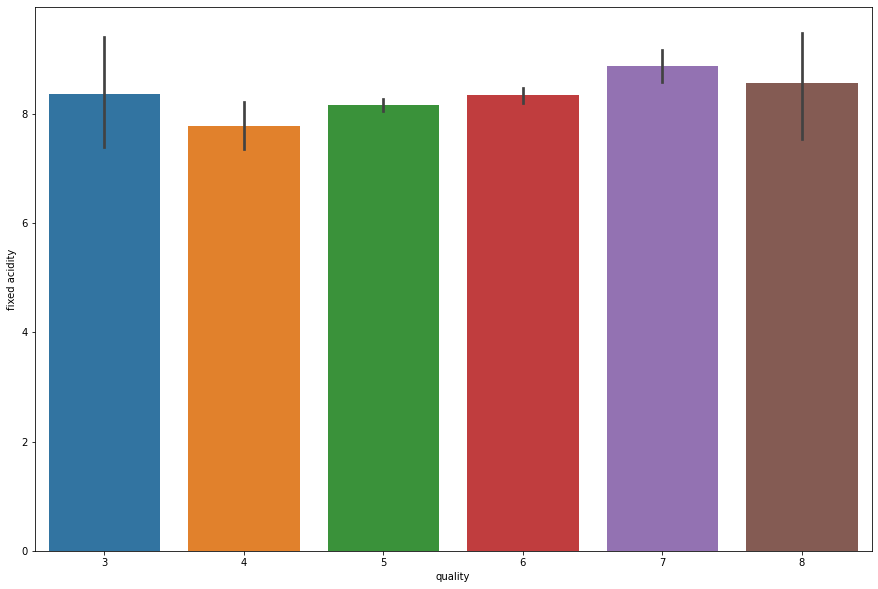

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

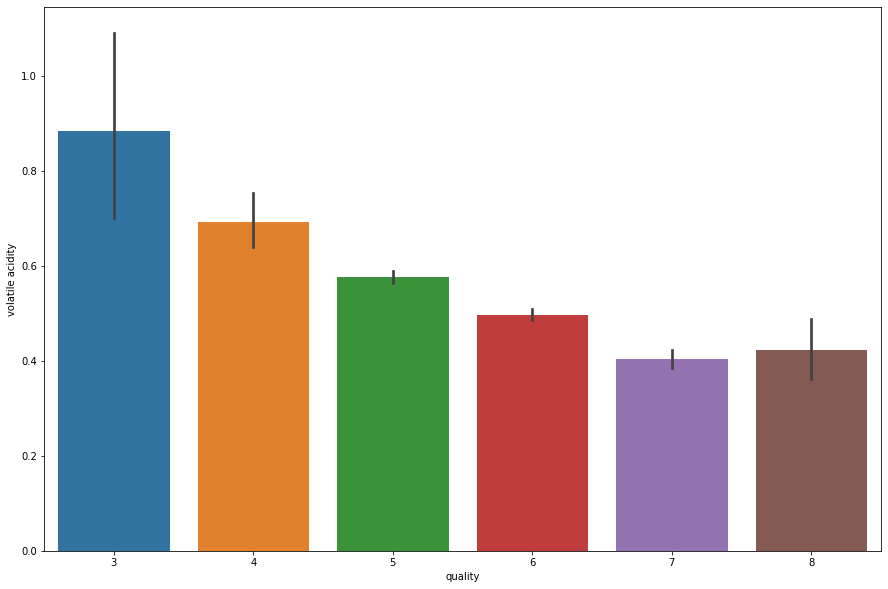

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

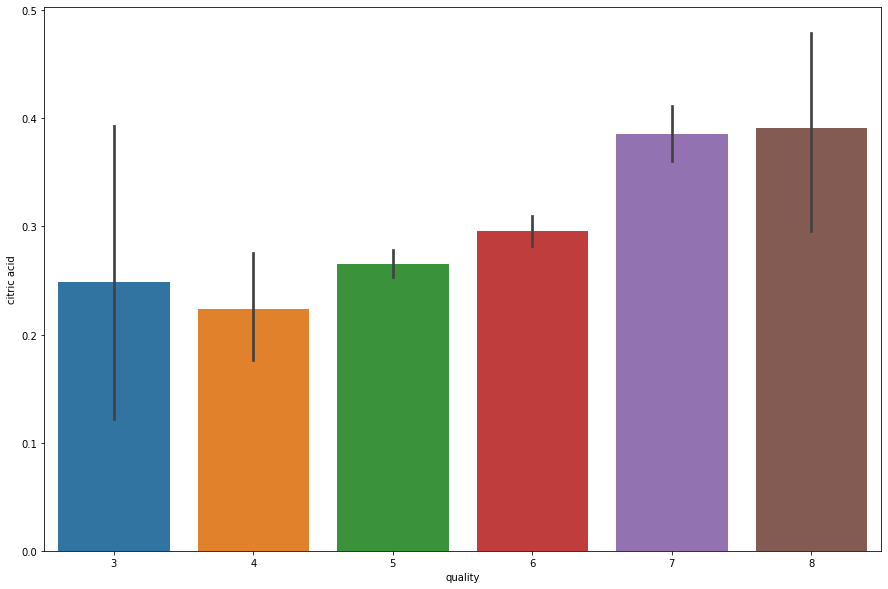

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

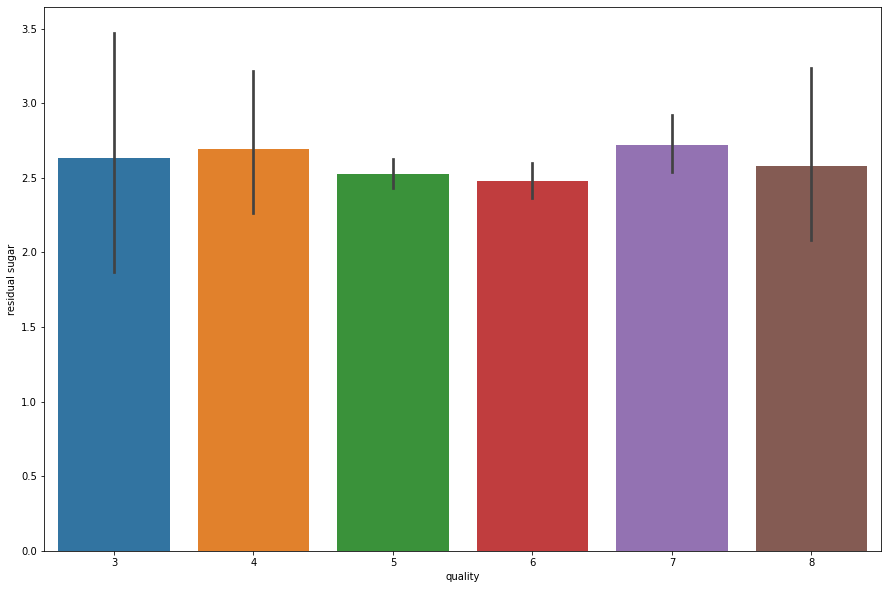

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

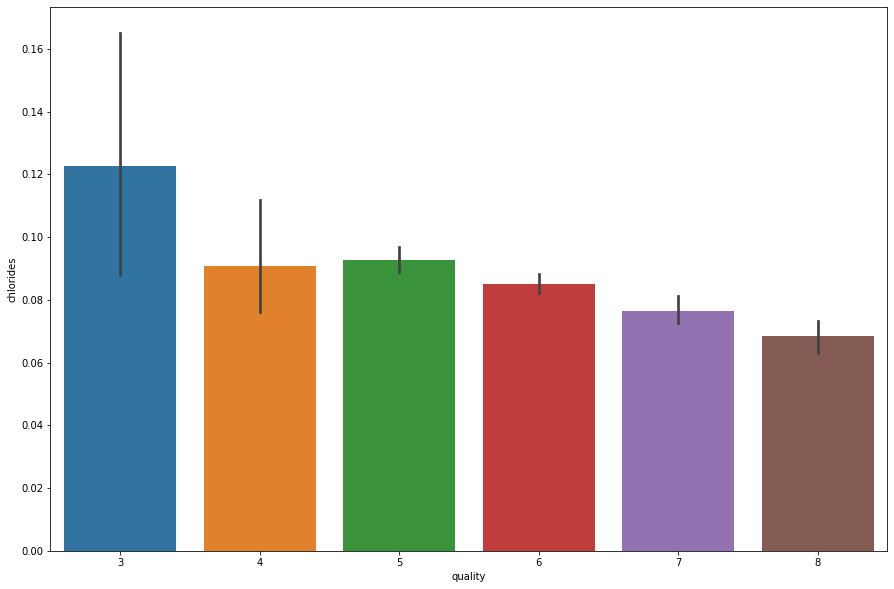

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)


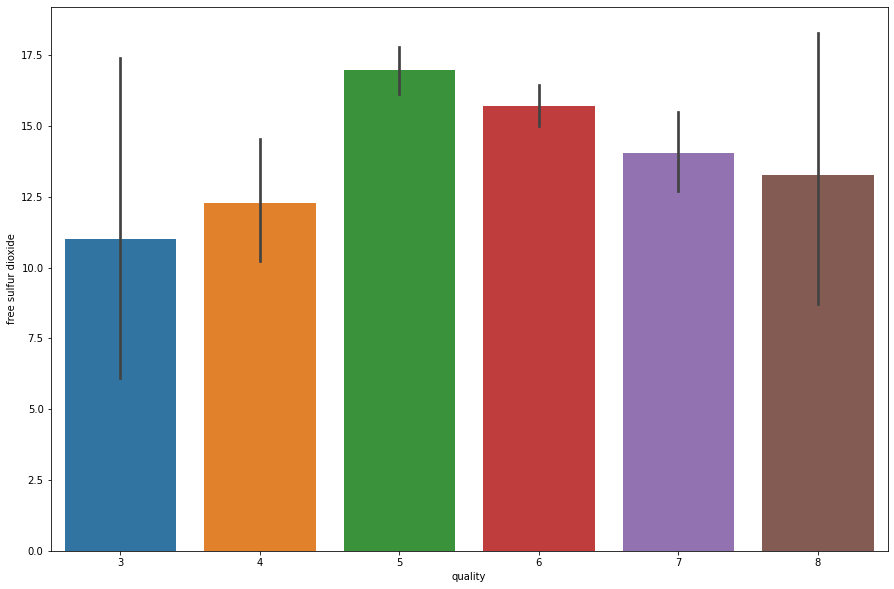

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

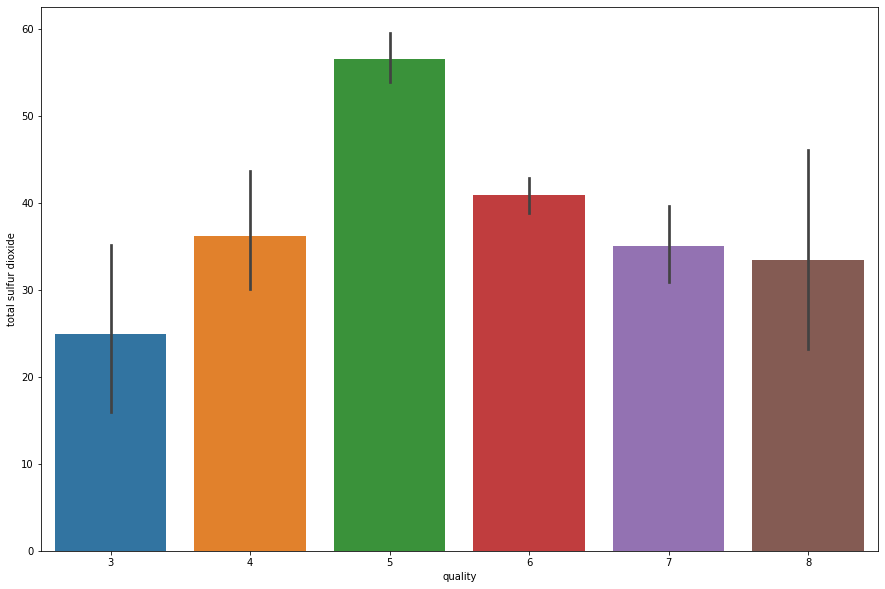

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

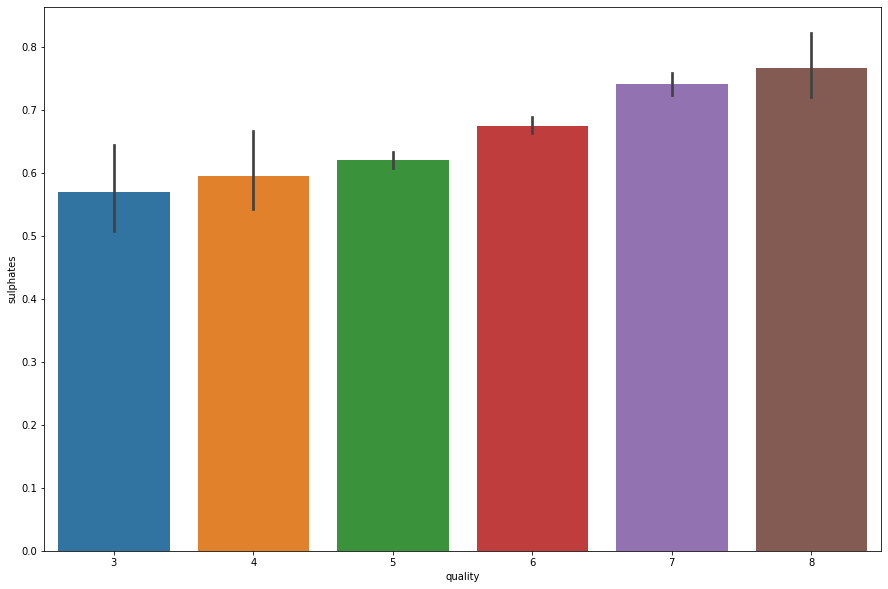

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

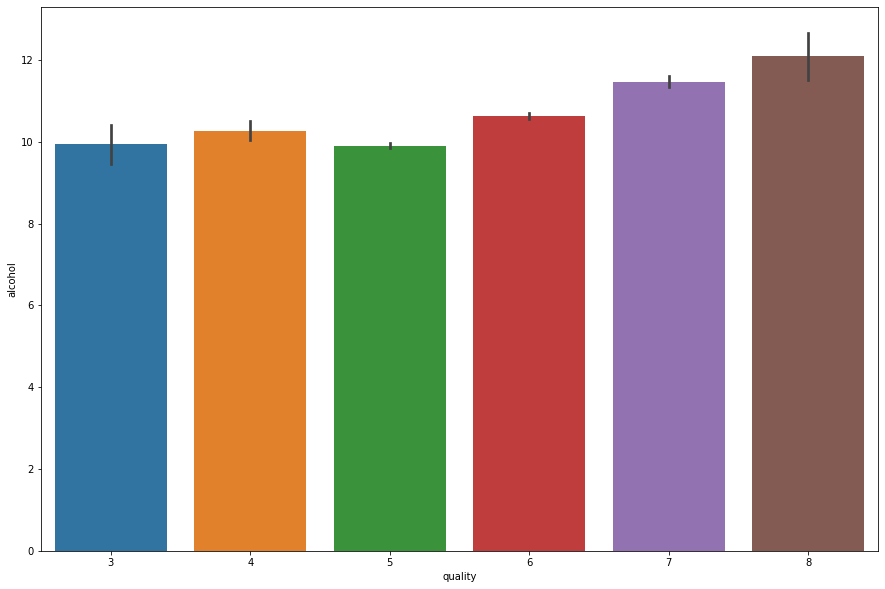

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Here, we have counted the number of each class and checked correlation of the columns



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

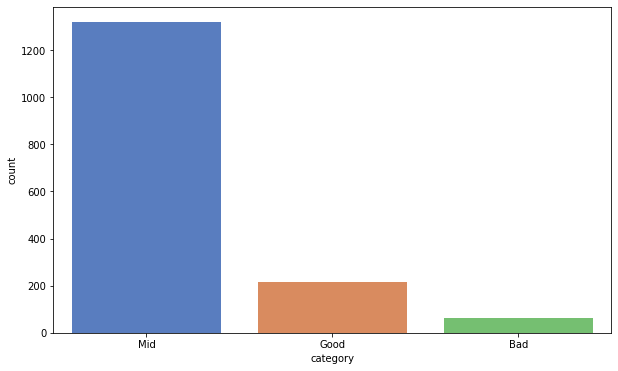

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

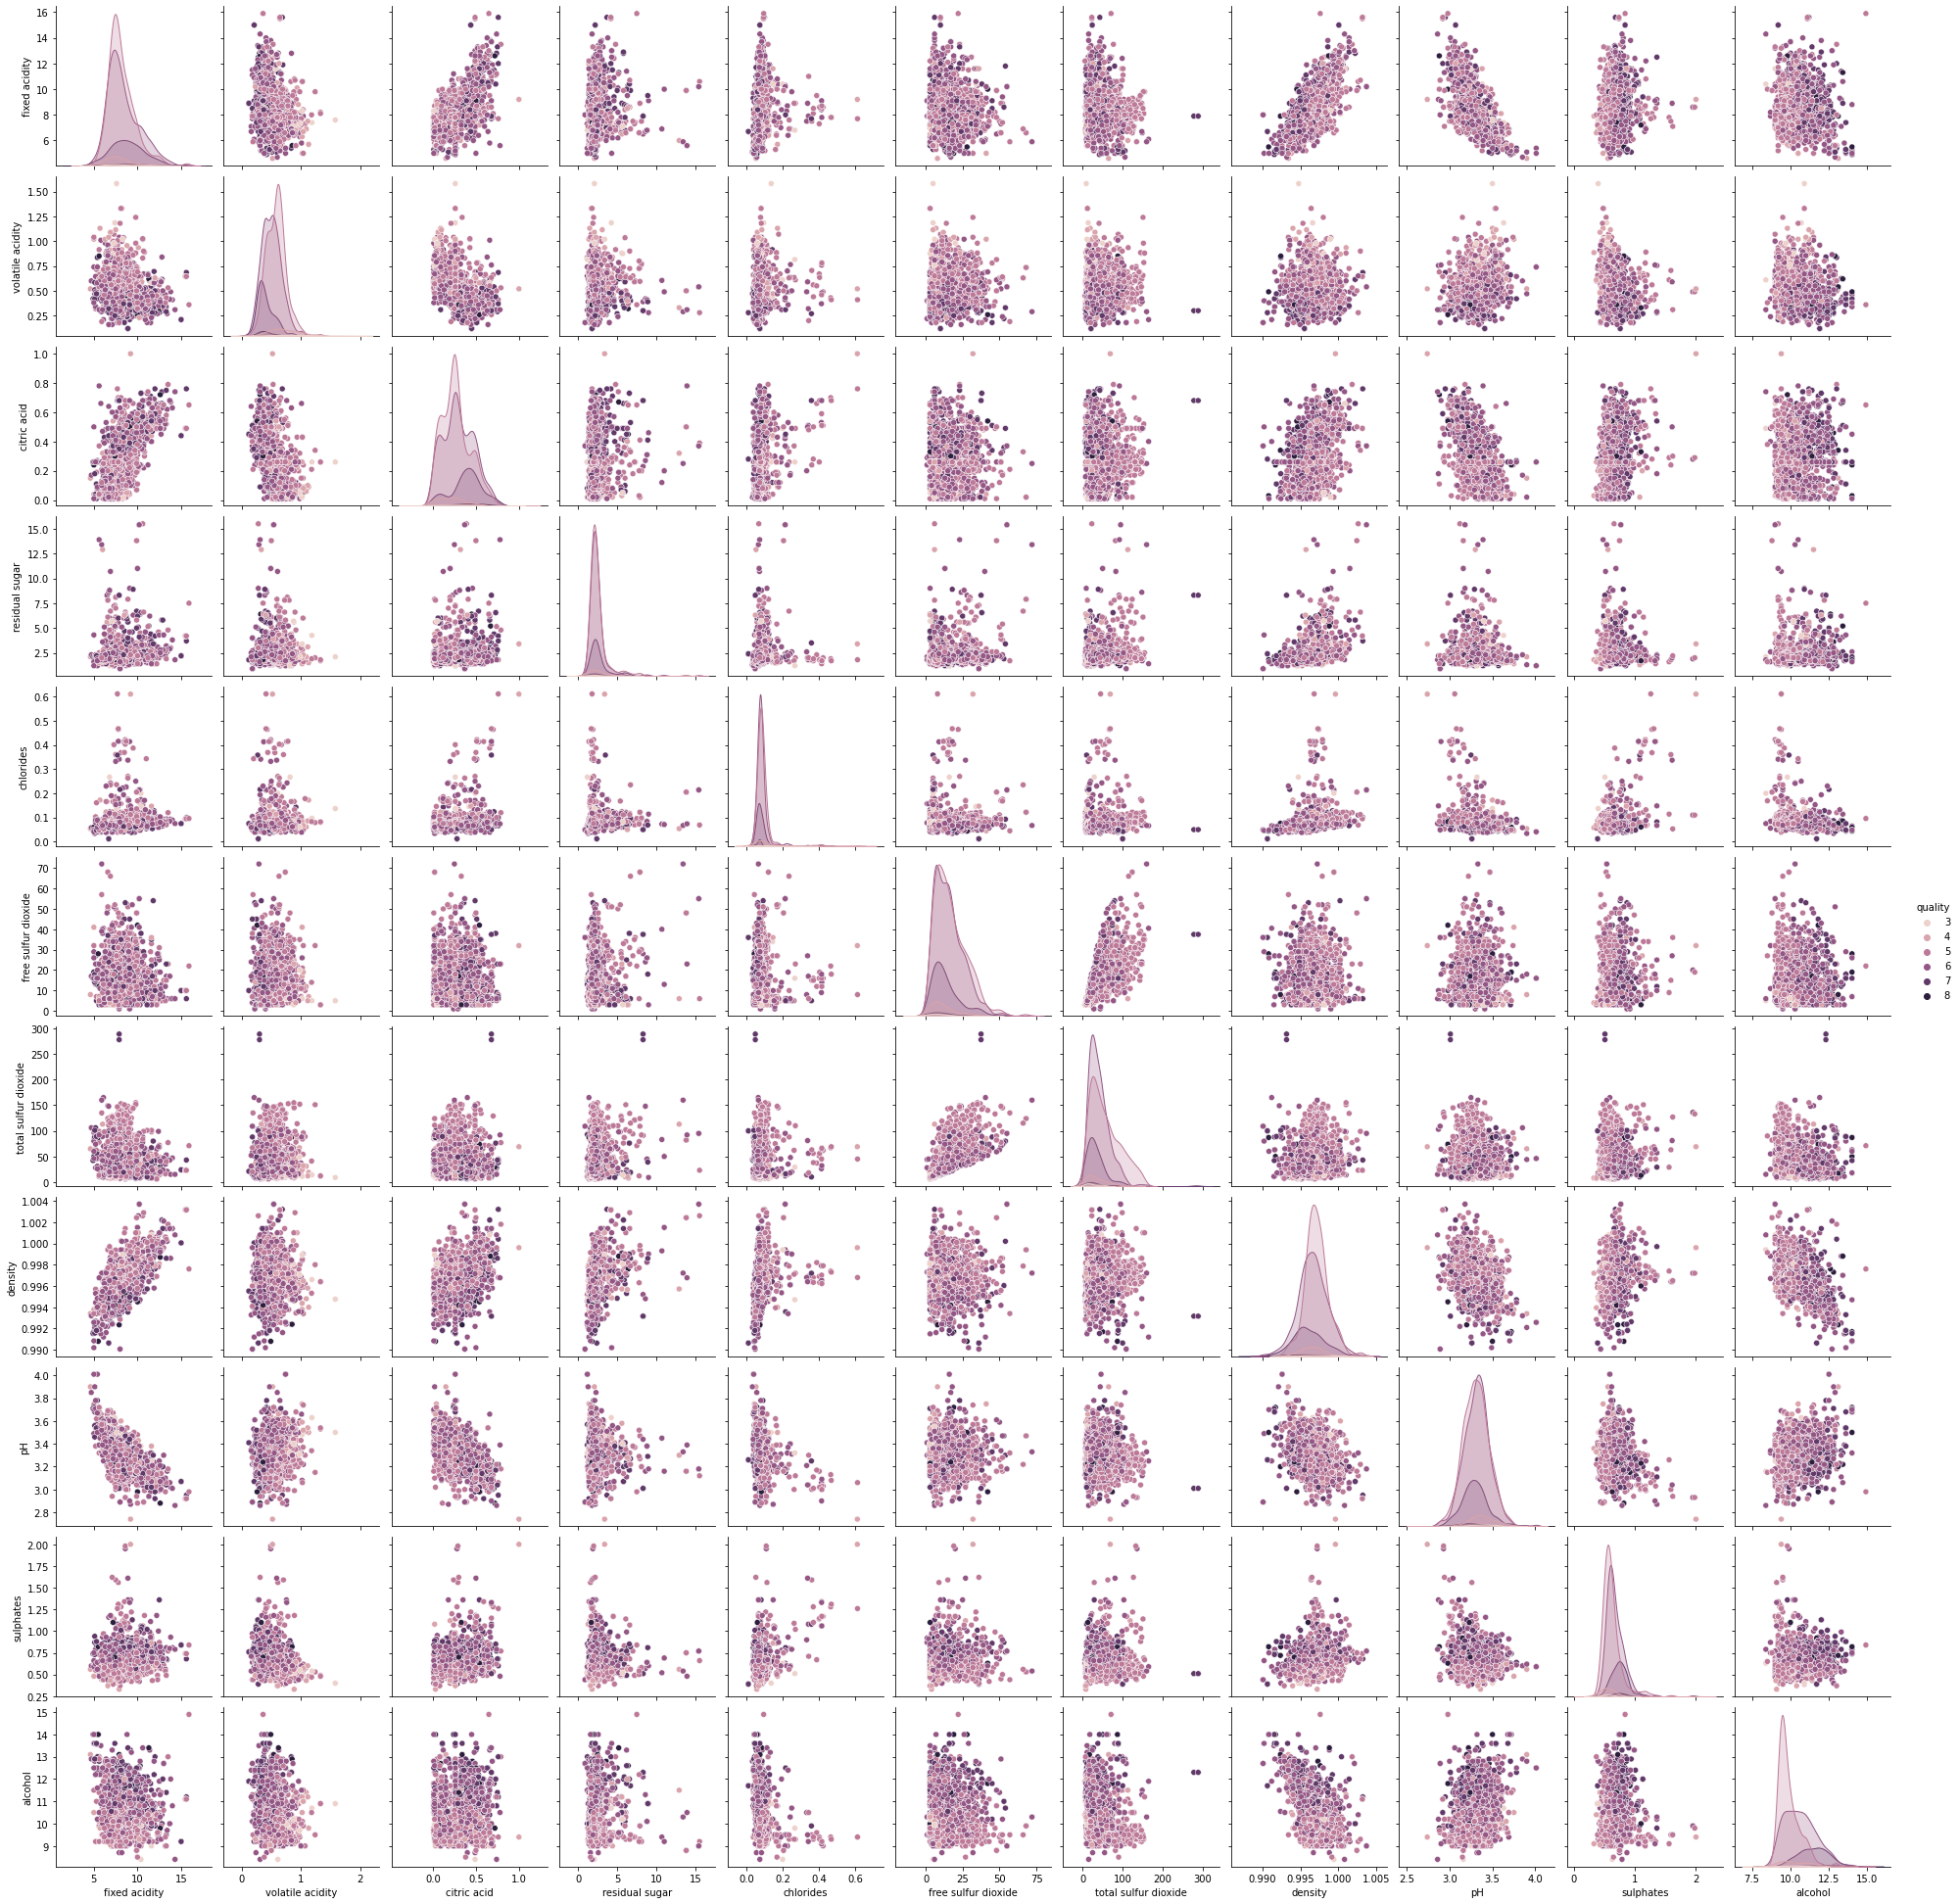

In [ ]:
# when you specify through hue, it will show which part of the data is which class based on the target values
sns.pairplot(wine, hue='quality', vars = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol',])

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.646081,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.495891,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.646081,-0.495891,1.000000,0.131970,0.213416,-0.073625,-0.014208,0.347732,-0.481581,0.305412,0.133390,0.214693
residual sugar,0.114777,0.001918,0.131970,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.213416,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.073625,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,-0.014208,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.347732,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.481581,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.305412,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


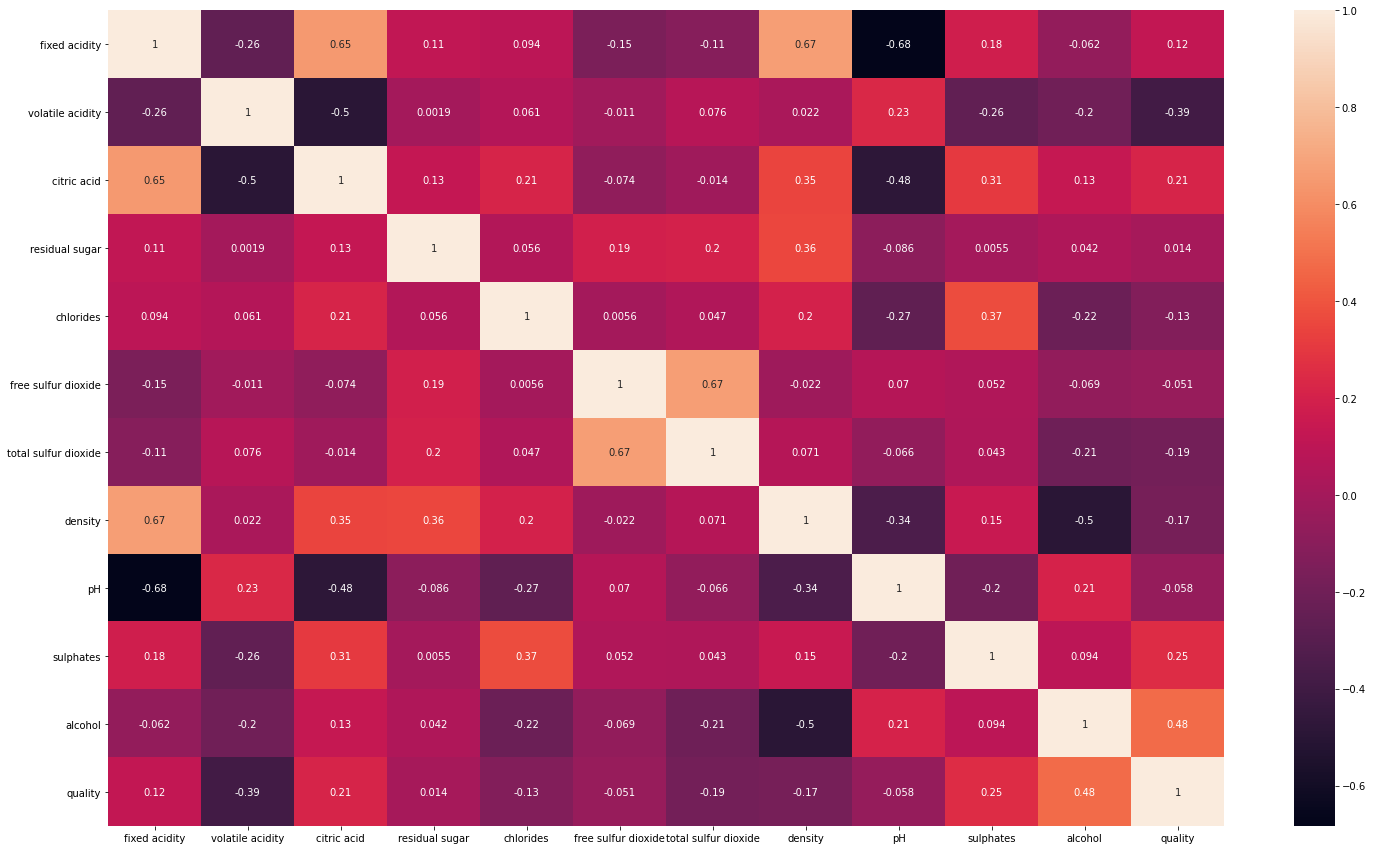

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(wine.corr(), annot= True)

#Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
X= data.iloc[:,:-1].values # Features
y=data.iloc[:,-1].values # Target variable

Setting features, labels and Encoding the categorical data

(good=1, med=2, bad=3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 2, 2, 2])

# Splitting Data(Training and Testing Data)

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function **train_test_split()**. You need to pass 3 parameters **features**, **target**, and **test_set size**. Additionally, you can use random_state to select records randomly.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# training and testing sets are divided in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

Here, the Dataset is broken into two parts in a ratio of **80:20**. It means **80%** data will be used for model training and **20%** for model testing.


In [ ]:
# Scaling the data for optimise predictions
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Development and Prediction

First, import the **K-Nearest Neighbours** module and create a K-Nearest Neighbours classifier object using **KNeighborsClassifier()** function.

Then, fit your model on the train set using **fit()** and perform prediction on the test set using **predict()**.

In [ ]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# fit the model with data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# predict the model  
pred_knn=knn.predict(X_test)
pred_knn

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# import the metrics class
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, pred_knn)

print(conf_matrix)

[[  0   1  12]
 [  0  16  14]
 [  0  13 264]]


Model Accuracy

In [ ]:
acc_score = accuracy_score(y_test, pred_knn)
print(acc_score*100)

87.5


We achieved 87.5% accuracy.

#Visualizing Confusion Matrix using Heatmap


Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

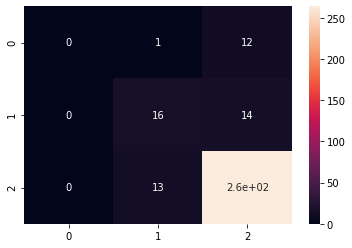

In [ ]:
sns.heatmap(conf_matrix, annot = True)

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [ ]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.53      0.53      0.53        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.84      0.88      0.86       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusion

You have learned what the K-Nearest Neighbors(KNN) is, how to build respective models, how to visualize results and also,improving the performance of an KNN model, and testing model accuracy using Confusion Matrix.